In [4]:
import pandas
import torch
from transformers import AutoModel, AutoTokenizer

In [5]:
data = pandas.read_csv("data_clean.csv")

In [6]:
tokenizer = AutoTokenizer.from_pretrained("google-bert/bert-base-multilingual-cased")

In [7]:
tok = [tokenizer.encode(s) for s in data['short_description']]

In [8]:
inv_vocab = {v: k for k, v in tokenizer.vocab.items()}

In [9]:
sentence_id = 330
[inv_vocab[t] for t in tok[sentence_id]]

['[CLS]',
 'Ga',
 '##in',
 'peace',
 'of',
 'mind',
 'with',
 'Safe',
 '##e',
 '-',
 'a',
 'security',
 'app',
 'offering',
 'disc',
 '##ree',
 '##t',
 'ale',
 '##rts',
 ',',
 'real',
 '-',
 'time',
 'tracking',
 ',',
 'and',
 'live',
 'video',
 'streaming',
 '.',
 'En',
 '##sur',
 '##ing',
 'your',
 'family',
 "'",
 's',
 'safety',
 '24',
 '/',
 '7',
 '.',
 '[SEP]']

39.21344537815126


(array([ 5.,  4., 13., 32., 29., 55., 54., 88., 76., 61., 52., 38., 38.,
        22., 14.,  1.,  9.,  3.,  0.,  1.]),
 array([ 6.  ,  9.95, 13.9 , 17.85, 21.8 , 25.75, 29.7 , 33.65, 37.6 ,
        41.55, 45.5 , 49.45, 53.4 , 57.35, 61.3 , 65.25, 69.2 , 73.15,
        77.1 , 81.05, 85.  ]),
 <BarContainer object of 20 artists>)

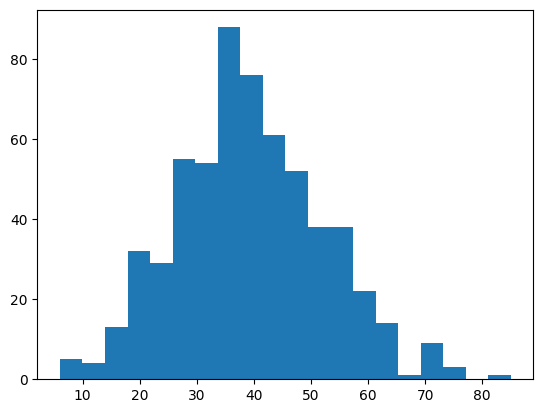

In [10]:
# token number
tok_len = [len(t) for t in tok]
# average number of tokens per description
print(sum(tok_len) / len(tok_len))
import matplotlib.pyplot as plt
plt.hist(tok_len, bins=20)

In [11]:
model = AutoModel.from_pretrained("google-bert/bert-base-multilingual-cased")
model.eval()

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(119547, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=Fals

In [12]:
encoded_input = tokenizer(data['short_description'][0], return_tensors='pt')
output = model(**encoded_input)
output.last_hidden_state.mean(dim=1) # mean pooling of embeddings on last hidden layer

tensor([[ 9.8065e-02,  1.6651e-01, -1.8939e-02, -2.7107e-01,  3.9282e-01,
         -8.3709e-03, -2.7939e-01,  1.3728e-01, -2.7464e-01, -5.3179e-01,
          7.3622e-03,  3.3644e-01,  3.8090e-01,  9.6592e-02,  1.8355e-01,
         -1.5070e-01,  6.8820e-01, -1.9295e-01,  1.7938e-01,  2.5017e-01,
         -1.7370e-01,  1.9678e-01, -6.1971e-01, -2.2688e-01,  1.1344e-01,
         -5.1034e-01, -1.0806e-01,  9.6186e-02, -2.8496e-01, -5.4674e-01,
          5.6678e-02,  7.4643e-01, -5.5679e-01,  5.7034e-01,  4.4453e-01,
          4.0408e-01,  2.2320e-02, -1.7045e-01, -1.4676e-01,  1.3386e-01,
         -4.0712e-02,  5.8999e-01, -6.7270e-02, -2.0161e-01,  1.0164e-01,
         -6.6286e-02,  1.6539e-01,  5.3392e-01, -3.4604e-01,  1.0465e-01,
          3.4864e-01, -1.0852e-01,  5.1674e-01, -1.1382e-01, -5.4173e-02,
          1.7880e-01, -3.1697e-01, -3.7485e-01,  1.3706e-01,  1.4350e-01,
          9.3529e-02,  2.2708e-02, -1.3421e-01, -6.5950e-02, -2.3739e-01,
         -4.5314e-01,  2.2651e-01, -4.

In [28]:
def embed(text: str):
    tokens = tokenizer(text, return_tensors='pt')
    output = model(**tokens)
    return output.last_hidden_state.mean(dim=1).tolist()[0]

In [29]:
embeddings = [embed(s) for s in data['short_description']]

In [30]:
pandas.DataFrame(embeddings).to_csv("embed_bert.csv")